In [54]:
%load_ext autoreload
%autoreload 2
from controller import normalization as norm
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec

#ploty
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


import seaborn as sns

from tqdm.auto import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
PATH_FILES = os.path.join(os.getcwd(), "files")

In [37]:
list_files = norm.import_list_csv(PATH_FILES)
df_names = ['df_contract', 'df_internet', 'df_personal', 'df_phone']

In [38]:
print(df_names)

['df_contract', 'df_internet', 'df_personal', 'df_phone']


In [39]:
list_files[df_names[0]].head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [40]:
list_files[df_names[0]]['EndDate'] = norm.adjust_data_time(list_files[df_names[0]]['EndDate'].replace('No',''), format_time='%Y-%m-%d %H:%M:%S')
list_files[df_names[0]]['BeginDate'] = norm.adjust_data_time(list_files[df_names[0]]['BeginDate'], format_time='%Y-%m-%d')
list_files[df_names[0]]['PaperlessBilling'] = list_files[df_names[0]]['PaperlessBilling'].apply(lambda x: 1 if x == 'Yes' else 0)
list_files[df_names[0]]['TotalCharges'] = norm.pd.to_numeric(list_files[df_names[0]]['TotalCharges'],errors='coerce').fillna(0)    

In [41]:
list_files[df_names[1]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [42]:
list_files[df_names[1]].head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [43]:
for column in list_files[df_names[1]].columns:
    if column not in ['customerID', 'InternetService']:
        if list_files[df_names[1]][column].dtype == 'object':
            list_files[df_names[1]][column] = list_files[df_names[1]][column] \
                                                    .apply(lambda x: 1 if x == 'Yes' else 0)

In [44]:
list_files[df_names[2]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [45]:
list_files[df_names[2]].sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents
1404,1970-KKFWL,Female,0,No,No
3052,5151-HQRDG,Male,0,Yes,No
93,6067-NGCEU,Female,0,No,No
1538,6326-MTTXK,Male,0,No,No
7039,2234-XADUH,Female,0,Yes,Yes
1545,5193-QLVZB,Male,0,No,No
4148,9142-XMYJH,Female,0,No,No
3580,0260-ZDLGK,Female,0,No,Yes
5355,4724-WXVWF,Male,0,No,No
5092,5774-XZTQC,Female,0,Yes,Yes


In [46]:
list_files[df_names[2]]['gender'] = list_files[df_names[2]]['gender'].apply(lambda x: 1 if x == 'Male' else 0)
list_files[df_names[2]]['Partner'] = list_files[df_names[2]]['Partner'].apply(lambda x: 1 if x == 'Yes' else 0)
list_files[df_names[2]]['Dependents'] = list_files[df_names[2]]['Dependents'].apply(lambda x: 1 if x == 'Yes' else 0)


In [47]:
list_files[df_names[3]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [48]:
list_files[df_names[3]].head(10)

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
5,7892-POOKP,Yes
6,6388-TABGU,No
7,9763-GRSKD,No
8,7469-LKBCI,No
9,8091-TTVAX,Yes


In [49]:
list_files[df_names[3]]['MultipleLines'] = list_files[df_names[3]]['MultipleLines'].apply(lambda x: 1 if x == 'Yes' else 0).astype(bool)

In [50]:
main_df = list_files[df_names[0]].copy()
list_files.pop(df_names[0])
merge_files = list(list_files.values())

In [51]:
df_data = norm.standarize_titles(norm.merge_list_dataframe(main_df,merge_files,'customerID'))

In [52]:
df_data['timeservicedays'] = (df_data['enddate'] - df_data['begindate']).dt.days
df_data['objective'] = df_data['enddate'].apply(lambda x: 0 if norm.pd.notnull(x) else 1)
df_data['beginmonth'] = df_data['begindate'].dt.month
df_data['beginyear'] = df_data['begindate'].dt.year

In [53]:
df_data.head(5)  

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,gender,seniorcitizen,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,multiplelines,timeservicedays,objective,beginmonth,beginyear
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,1,Electronic check,29.85,29.85,0,0,...,1.0,0.0,0.0,0.0,0.0,NaN,NaN,1,1,2020
1,5575-GNVDE,2017-04-01,NaT,One year,0,Mailed check,56.95,1889.50,1,0,...,0.0,1.0,0.0,0.0,0.0,False,NaN,1,4,2017
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,1,Mailed check,53.85,108.15,1,0,...,1.0,0.0,0.0,0.0,0.0,False,61.0,0,10,2019
3,7795-CFOCW,2016-05-01,NaT,One year,0,Bank transfer (automatic),42.30,1840.75,1,0,...,0.0,1.0,1.0,0.0,0.0,NaN,NaN,1,5,2016
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,1,Electronic check,70.70,151.65,0,0,...,0.0,0.0,0.0,0.0,0.0,False,61.0,0,9,2019


Streamlit https://finalprojecttripleten-67qfr5pypoynk2npwzn5ew.streamlit.app/

Iniciamos con la evaluacion de los datos que muestran una distribucion casi homohenea para quienes reciben su factura via electronica a quienes no, de igual manera una participacion mas activa para los planes que son mes a mes frente a los de largo plazo como lo son de 1 y 2 años.

De igual manera existe una clara preferencia a un pago electronico que respaldaria los datos de los usuarios quienes prefieren de igual manera recibir sus facturas via electronica o tienen configurado su pago de forma automatica.

Al evaluar la informacion distribuida por tipo de pago y tipo de plan se ve un cambio en la distrucion observando que solo para el pago electronico el mes a mes es mucho mas frecuente, esto nos llevo a evaluar que datos se encuentran fuera de la media y las sospechas fueron confirmadas al observar que existen datos fuera de la media. Usuarios con comportamientos atipicos que afectan la media.

Con el objetivo de identificar el foco de la alerta, observamos que los usuarios que tienen un pago mensual tienden a irse alrededor de 4 meses despues de cumplir el año, los de un año alrededor de 7 meses finalmente los de dos años no cumplen con su totalidad sin embargo la cantidad de clientes que abandonaron el plan versus los activos no representa un impacto negativo respecto al plan de 2 años.

Podemos en primera instancia concluir que el tiempo de maximo de retencion es de alrededor de 1 y medio para cualquiera de los planes.

<Axes: xlabel='beginyear', ylabel='customerid'>

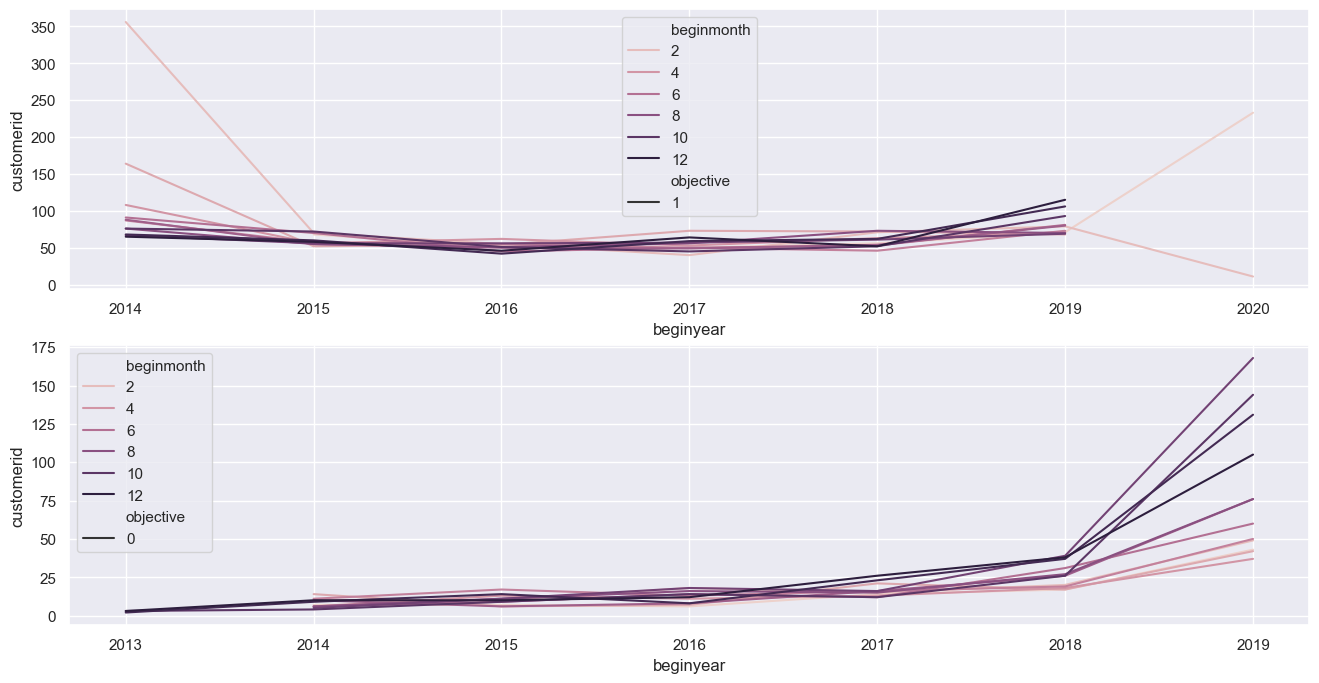

In [707]:
fig2 = plt.figure(figsize=(16, 8))
gs = gridspec.GridSpec(2, 2)

data = df_data.loc[:,['beginyear','beginmonth','customerid','objective']] \
    .sort_values(['beginyear','beginmonth'],ascending=True) \
    .groupby(by=['beginyear','beginmonth','objective'],as_index=False) \
    .count()
    
ax = fig2.add_subplot(gs[0,:3])    
sns.lineplot(data=data.query('objective==1'),x='beginyear',y='customerid',hue='beginmonth',style= 'objective',ax=ax)
ax = fig2.add_subplot(gs[1,:3]) 
sns.lineplot(data=data.query('objective==0'),x='beginyear',y='customerid',hue='beginmonth',style= 'objective',ax=ax)     

Los datos muestran que los datos de clientes activos estan en la brecha de 2020 en adelante, esto podria ser importante en caso de que necesitemos sobrecargar los datos para balancear el historico de 5 años.  

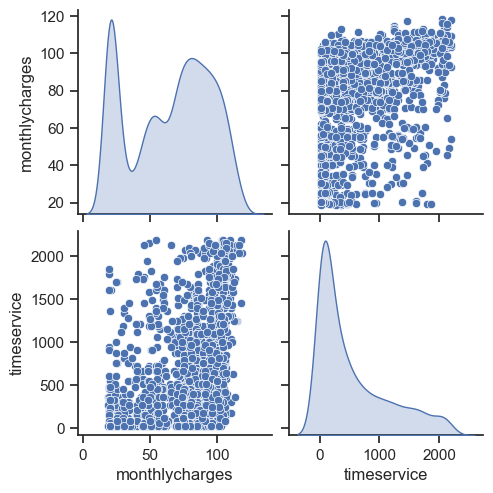

In [241]:
sns.set_theme(style="ticks")
sns.pairplot(df_data.select_dtypes(include=['int64','float64']), diag_kind='kde')

In [ ]:
%streamlit run app.py   

UsageError: Line magic function `%streamlit` not found.


<Axes: >

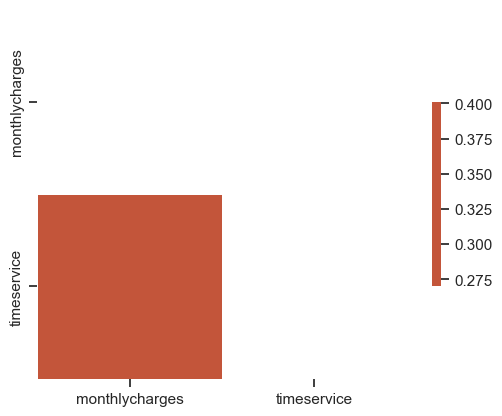

In [243]:
corr = df_data.select_dtypes(include=['int64','float64']).corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = norm.np.triu(norm.np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

paperlessbilling
1    4171
0    2872
Name: count, dtype: int64

In [ ]:
# Contar valores ausentes
print(df[df['track']=='unknown']['track'].count())
ata_by_day = df.groupby(by=['city','day'])['track'].count()

count_out = data.query("day == @day & city == @city")['user_id'].count()

inst_orders.sort_values(by = ['order_id','product_id'],ascending=True, inplace=True) # sorting




df_order_products.drop_duplicates(subset=['order_id','product_id'],inplace=True)

#crea una linea como la media 
fixed_monthly_payment = 20
surf.axhline(y=fixed_monthly_payment, color='black', linestyle='-', label='Monthly Payment ($20)')


wednesday = df_instacart_orders.query('order_dow == 3').groupby(['order_hour_of_day'],as_index = False).count()
saturday = df_instacart_orders.query('order_dow == 6').groupby(['order_hour_of_day'],as_index = False).count()

list_products = merge_orders_products.groupby(by=['product_id','product_name'],as_index=False).count().sort_values('order_id',ascending=False).head(20)